In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


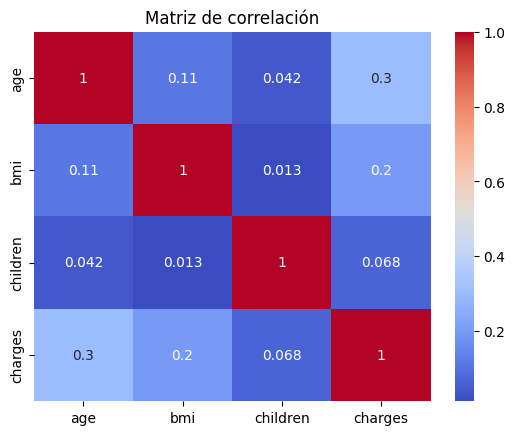

In [ ]:
# Matriz de correlación
corr = df.corr(numeric_only=True) #
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Contar valores únicos en columnas categóricas
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())


sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [ ]:
# Min-Max scaler


df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
total_df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
total_df_scal.head()

total_df_scal
"""#Esto me permite hacer que las variables categoricas de transformen en binarias

ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['sex', 'smoker', 'region']]).toarray())

ohe_df.columns = ohe.get_feature_names_out(['sex', 'smoker', 'region'])
df2 = df.join(ohe_df)
df2 = df2.drop(['sex', 'smoker', 'region'], axis=1)

print(df2.head())

#df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

#df.join(ohe_df)
#df.head()"""

"#Esto me permite hacer que las variables categoricas de transformen en binarias\n\nohe = OneHotEncoder(handle_unknown='ignore')\nohe_df = pd.DataFrame(ohe.fit_transform(df[['sex', 'smoker', 'region']]).toarray())\n\nohe_df.columns = ohe.get_feature_names_out(['sex', 'smoker', 'region'])\ndf2 = df.join(ohe_df)\ndf2 = df2.drop(['sex', 'smoker', 'region'], axis=1)\n\nprint(df2.head())\n\n#df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)\n\n#df.join(ohe_df)\n#df.head()"

In [ ]:
#Esto intenta transformar todas las variables en enteros
#df = df.astype(int, errors='ignore')


In [ ]:
print(df.head())

   age     sex     bmi  children smoker     region      charges  sex_n  \
0   19  female  27.900         0    yes  southwest  16884.92400      0   
1   18    male  33.770         1     no  southeast   1725.55230      1   
2   28    male  33.000         3     no  southeast   4449.46200      1   
3   33    male  22.705         0     no  northwest  21984.47061      1   
4   32    male  28.880         0     no  northwest   3866.85520      1   

   smoker_n  region_n  
0         0         0  
1         1         1  
2         1         1  
3         1         2  
4         1         2  


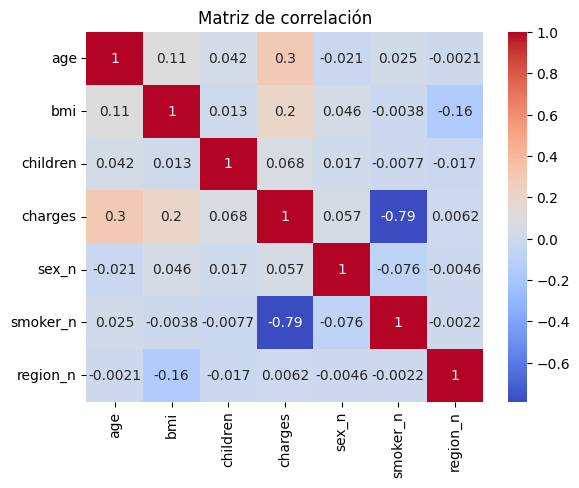

In [ ]:
# Matriz de correlación
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   sex_n     1338 non-null   int64  
 8   smoker_n  1338 non-null   int64  
 9   region_n  1338 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.7+ KB


In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# Definir hiperparámetros para búsqueda
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
lrs = [0, 0.5, 1]
# Diccionario para almacenar errores
errors = {}
# Validación cruzada para encontrar los mejores hiperparámetros
kfold = KFold(n_splits=5, shuffle=True, random_state=123)
for alpha in alphas:
    errors[alpha] = {}
    for lr in lrs:
        fold_errors = []
        model = ElasticNet(alpha=alpha, l1_ratio=lr, random_state=47)
        for train_idx, test_idx in kfold.split(X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
            y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
            model.fit(X_train_fold, y_train_fold)
            fold_errors.append(mean_squared_error(y_test_fold, model.predict(X_test_fold)))
        errors[alpha][lr] = np.mean(fold_errors)
# Encontrar los mejores hiperparámetros
best_alpha, best_lr = min(
    ((a, l) for a in alphas for l in lrs),
    key=lambda pair: errors[pair[0]][pair[1]]
)
# Entrenar modelo final con los mejores hiperparámetros
best_model = ElasticNet(alpha=best_alpha, l1_ratio=best_lr, random_state=123)
best_model.fit(X_train, y_train)
final_preds = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_preds)
print(f"Mejor alpha: {best_alpha}, Mejor l1_ratio: {best_lr}")
print(f"Error cuadrático medio en test: {final_mse}")

In [ ]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
print(f"Lasso MSE: {lasso_mse}")

In [ ]:
y_pred = ridge_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE) en validación: {mse}")
print(f"Coeficiente de Determinación (R²) en validación: {r2}")
